In [1]:
# Importation des bibliothèques nécessaires

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


In [2]:
df = pd.read_csv('data/logistic_regression_dataset.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   sex              4238 non-null   object 
 4   is_smoking       4238 non-null   object 
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   float64
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       3390 non-null   float64
dtypes: float64(10)

In [4]:
#On convertit la variable categorique 'sex' en variable numerique
encoder = LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,1,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,0,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,1,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,0,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,0,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,0,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,1,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,0,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


In [5]:
#On convertit la variable categorique 'is_smoking' en variable numerique
encoder = LabelEncoder()
df['is_smoking']=encoder.fit_transform(df['is_smoking'])
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,0,0,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,0,0,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,1,0,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,0,0,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


In [6]:
#On designe la variable 'id' comme index, et fixons cette modification
df.set_index('id', inplace=True)

In [7]:
#On cherche l'existence de valeurs manquantes
df.isnull().sum()

#Pour chaque variable, on remplace les valeurs manquantes par la valeur mediane
for column in df.columns:
    df[column] = df[column].fillna(df[column].median())

In [8]:
#On verifie qu'il n'y ait plus de valeur manquante
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
'''
On utilise l'algorithme chi squared pour selectionner les 10 meilleurs features. 
C’est une méthode de sélection de caractéristiques utilisée pour déterminer la relation entre des donnees categorielles.
'''
V = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(V, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(V.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score'))

              Specs       Score
10            sysBP  580.794223
14          glucose  395.543880
9           totChol  262.764915
4        cigsPerDay  255.837258
0               age  241.985830
11            diaBP  104.970431
7      prevalentHyp   66.487439
8          diabetes   34.115603
5            BPMeds   24.774640
6   prevalentStroke   18.408137


In [10]:
#1. Apply logistic regression. 

##On sélectionne les features pour la régression
x = df[['sysBP','glucose','totChol','cigsPerDay','diabetes','sex','BPMeds','prevalentStroke','prevalentHyp','diabetes','age']]

## Sélectionne la variable cible pour la régression
y = df['TenYearCHD']

## Divise les données en ensembles d'entraînement et de test avec une taille de test de 25%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

##On applique la regression logistique et predit les valeurs de y sur la base de x_test
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

C:\Users\maman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#2. Use a confusion matrix to validate your model. 

## Generation d'une matrice de confusion
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

###Affichage de la matrice
print(conf_matrix)



[[913   2]
 [134  11]]


<Axes: xlabel='Predicted', ylabel='Actual'>

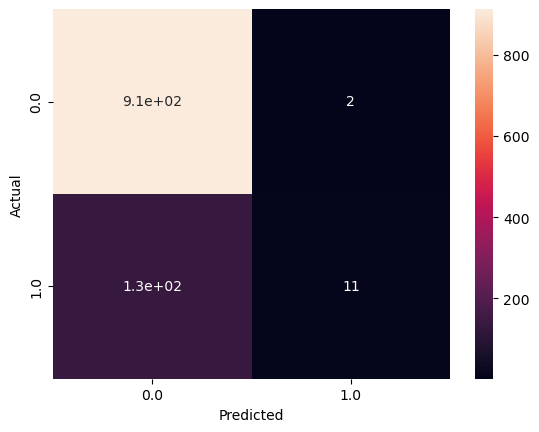

In [16]:

###Visualisation de la matrice
sns.heatmap(confusion_matrix, annot=True)

In [17]:
from sklearn.metrics import roc_auc_score
#3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

##Explication
'''
La courbe ROC est un outil graphique utilisé pour évaluer la performance d’un modèle de classification, comme la régression logistique. 
Elle est créée en traçant le taux de vrais positifs (sensibilité) en fonction du taux de faux positifs (1 - spécificité), à différents seuils de classification.

L’AUC représente l’aire sous la courbe ROC. Elle fournit une mesure agrégée de la performance du modèle de classification à tous les seuils de classification possibles. 

Dans le contexte de la régression logistique, la courbe ROC et l’AUC sont souvent utilisées pour évaluer la qualité du modèle.

Une AUC de 1 indique que le modèle a une excellente capacité à distinguer entre les différentes classes.
Une AUC de 0,5 indique que le modèle n’a pas de capacité à distinguer entre les classes.
Une AUC de 0 indique que le modèle classe systématiquement les exemples de manière incorrecte.
'''
##Utilisation sur notre cas
auc = roc_auc_score(y_test, predictions)
print(auc)


0.5368381383078952
